| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 

**Authors:** Andrej Gajdoš, Martina Hančová, Jozef Hanč  <br> *[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), P. J. Šafárik University in Košice, Slovakia* <br> emails: [andrej.gajdos@student.upjs.sk](mailto:andrej.gajdos@student.upjs.sk), [martina.hancova@upjs.sk](mailto:martina.hancova@upjs.sk)
***
**<font size=6 color=brown> FDSLRM applications - Australian population </font>**  

<font size=5> Percentage change in the resident Australian population </font> 

<a id=table_of_contents></a>
###  Table of Contents 
* [Data and model](#data_and_model) - data and model description, estimating parameters, software
* [Modeling](#modeling) - loading R functions and packages, data plot, periodogram
* [Residual diagnostics](#residual_diagnostics) - description of graphical tools, numerical tests
* [Fitting summary](#fitting_summary) - estimated model parameters, fit summary
* [Session info](#session_info) - list of applied R packages in computations
* [References](#references) - list of detailed references for data and applied methods

**To get back to the contents, use <font color=brown>the Home key</font>.**

***
<a id=data_and_model></a>
# <font color=brown>Data and model </font>


### Data description

In this FDSLRM application we model the time series data set, denoted as `respc`, representing *quarterly percentage change in the resident Australian population*. The number of time series observations is $n=88$, the correspoding plot with more details is shown in the following section **_Modeling_**. The data was adapted from *Brockwell & Davis, 2016*.


### Model description

The population data can be succesfully fitted by the FDSLRM of the form:

$$ X(t)=\beta_1+\beta_2\sin\left(\tfrac{2\pi t}{88}\right)+\beta_3\cos\left(\tfrac{2\pi t\cdot 3}{88}\right)+\beta_4\sin\left(\tfrac{2\pi t\cdot 3}{88}\right)
+Y_1\sin\left(\tfrac{2\pi t\cdot 6}{88}\right)+Y_2\cos\left(\tfrac{2\pi t\cdot 22}{88}\right)+Y_3\sin\left(\tfrac{2\pi t\cdot 22}{88}\right)
+w(t), \, t\in \mathbb{N}.$$ 

### Computational software
As for numerical calculations, we conducted our computations in _the R statistical computing language_ (https://www.r-project.org; _R Development Core Team, 2019_) and with R functions designed to work with FDSLRM programmed by authors of the Jupyter notebook included in _fdslrm_ (Gajdoš et. al., 2019) package. The complete list of used R libraries is included in **_Session info_**.

>### Important note
>The iterative model building was done analogically as in our extended application examples  
>* [Tourism](Tourism.ipynb)
>* [Cyber attacks](Cyberattacks.ipynb)  
>
>with more details about modelling procedure, diagnostic tools and technical information.
>
>These two illustrative examples also belong to real data set illustrative examples in our current paper **Hančová et al., 2019** about estimating FDSLRM variance parameters with detailed description of used procedures. 
>
>* Hančová, M., Vozáriková, G., Gajdoš, A., Hanč, J. (2019). [Estimating variance components in time series
	linear regression models using empirical BLUPs and convex optimization](https://arxiv.org/abs/1905.07771), https://arxiv.org/, 2019, suplementary materials - software, notebooks at GitHub, https://github.com/fdslrm/EBLUP-NE.

| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 

***
<a id=modeling></a>
# <font color=brown>Modeling </font>

### Loading R functions and packages

In [1]:
# use this cell, if you started this notebook locally in your PC
library(fdslrm)
initialFDSLRM()

In [1]:
# use this cell, if you started this notebook in the Binder
devtools::source_url("https://github.com/fdslrm/fdslrmAllinOne/blob/master/fdslrmAllinOne.R?raw=TRUE")
initialFDSLRM()

SHA-1 hash of file is f56b9d53e72a8575947a467930a2bdddb5b500ad


### Read data

In [2]:
# reading data
x <- ts(as.numeric(read.table("data/respc.tsm", header = FALSE)[,1]), start = c(1971, 3), frequency = 4)
# times
t <- 1:length(x)

### Data plot

Quarterly percentage change in the resident Australian population from the 3rd quarter 1971 to the 2nd quarter 1993.

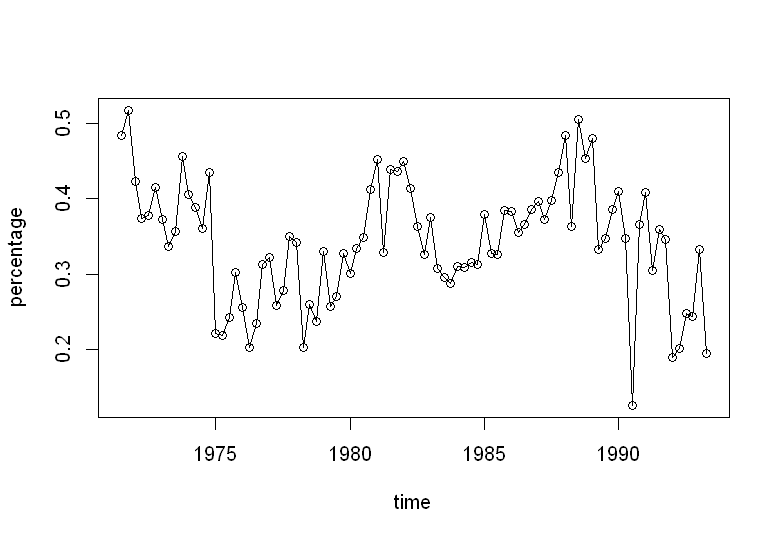

In [3]:
# IPython setting for output
options(repr.plot.res=120, repr.plot.height=4.5, repr.plot.width=6.5)

# plotting data
plot(x, type = "o", xlab = "time", ylab = "percentage")

### Spectral analysis - Periodogram 

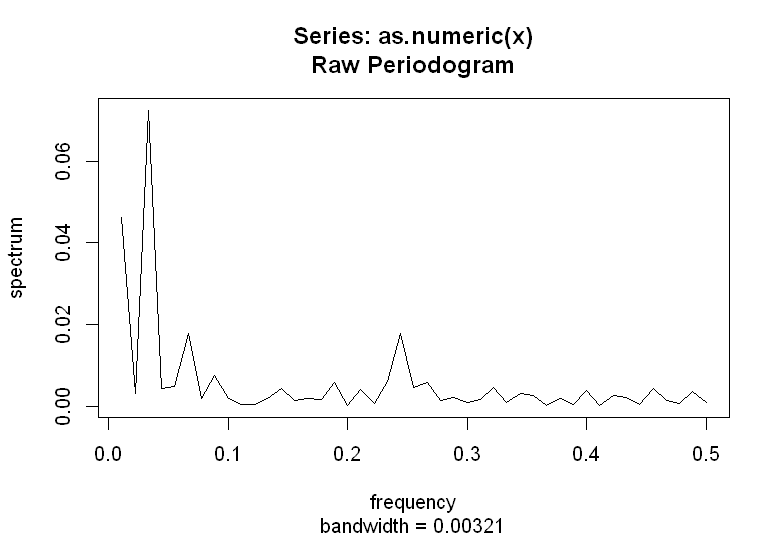

In [4]:
periodo <- spec.pgram(as.numeric(x), log="no")

#### Six most significant frequencies according to values of spectrum in periodogram

In [5]:
drawTable(type = "periodogram", periodogram = periodo)

spectrum,0.0725221,0.0462270,0.0179337,0.0177521,0.0074573,0.0061477
frequency (raw),0.0333333,0.0111111,0.0666667,0.2444444,0.0888889,0.2333333


In [6]:
# orders k for Fourier frequencies
print(round(length(x)*c(0.0333333,0.0111111,0.0666667,0.2444444,0.0888889,0.2333333)))

[1]  3  1  6 22  8 21


In [7]:
fnames= c("3/88", "$1/88$", "$6/88$", "$22/88$", "$8/88$", "$21/88$")
drawTable(type = "periodogram", periodogram = periodo, frequencies = fnames)

spectrum,0.072522117,0.046226967,0.017933723,0.017752144,0.007457284,0.006147725
frequency (raw),0.03333333,0.01111111,0.06666667,0.24444444,0.08888889,0.23333333
frequency,$3/88$,$$1/88$$,$$6/88$$,$$22/88$$,$$8/88$$,$$21/88$$


| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 

***
<a id=residual_diagnostics></a>
# <font color=brown> Residual diagnostics </font>

### Graphical (exploratory) tools 

>
>|$ $|$\large\mbox{Graphical-tools diagnostic matrix}$|$ $|
|---|------------------------------------------------|---| 
|   |   
|$\mbox{linearity of fixed effects (L)}$| $\mbox{outlying observations (O1)}\hspace{0.75cm}$ | $\mbox{independence of cond. errors (ACF)} $ |
|**stand. marg. residuals vs marg. fitted values**|**stand. marg. residuals vs times**$\hspace{0.75cm}$|**ACF of cond. residuals**|
|   |  
|$\mbox{homoscedascity of cond. errors (H)}$|$\mbox{outlying observations (O2)}\hspace{0.75cm}$|$\mbox{independence of cond. errors (PACF)} $ |
|**stand. cond. residuals vs cond. predictions**|**stand. cond. residuals vs times**$\hspace{0.75cm}$|**PACF of cond. residuals**|
|   | 
|$\mbox{normality of cond. errors (N1)}$|$\mbox{normality of cond. errors (N2)}\hspace{0.75cm}$|$\mbox{normality of cond. errors (N3)} $ |
|**histogram of cond. residuals**|**histogram of stand. least conf. residuals**$\hspace{0.75cm}$|**stand. least conf. residuals vs $\mathcal{N}(0,1)$ quantiles**|

More details about modelling procedure, diagnostic tools and technical information can be found in our extended illustration examples [cyberattacks](https://nbviewer.jupyter.org/github/fdslrm/EBLUP-NE/blob/master/Modeling/cyberattacks.ipynb), [tourism]( https://nbviewer.jupyter.org/github/fdslrm/EBLUP-NE/blob/master/Modeling/tourism.ipynb). Analogical steps of modelling and criteria of models quality also apply here. 

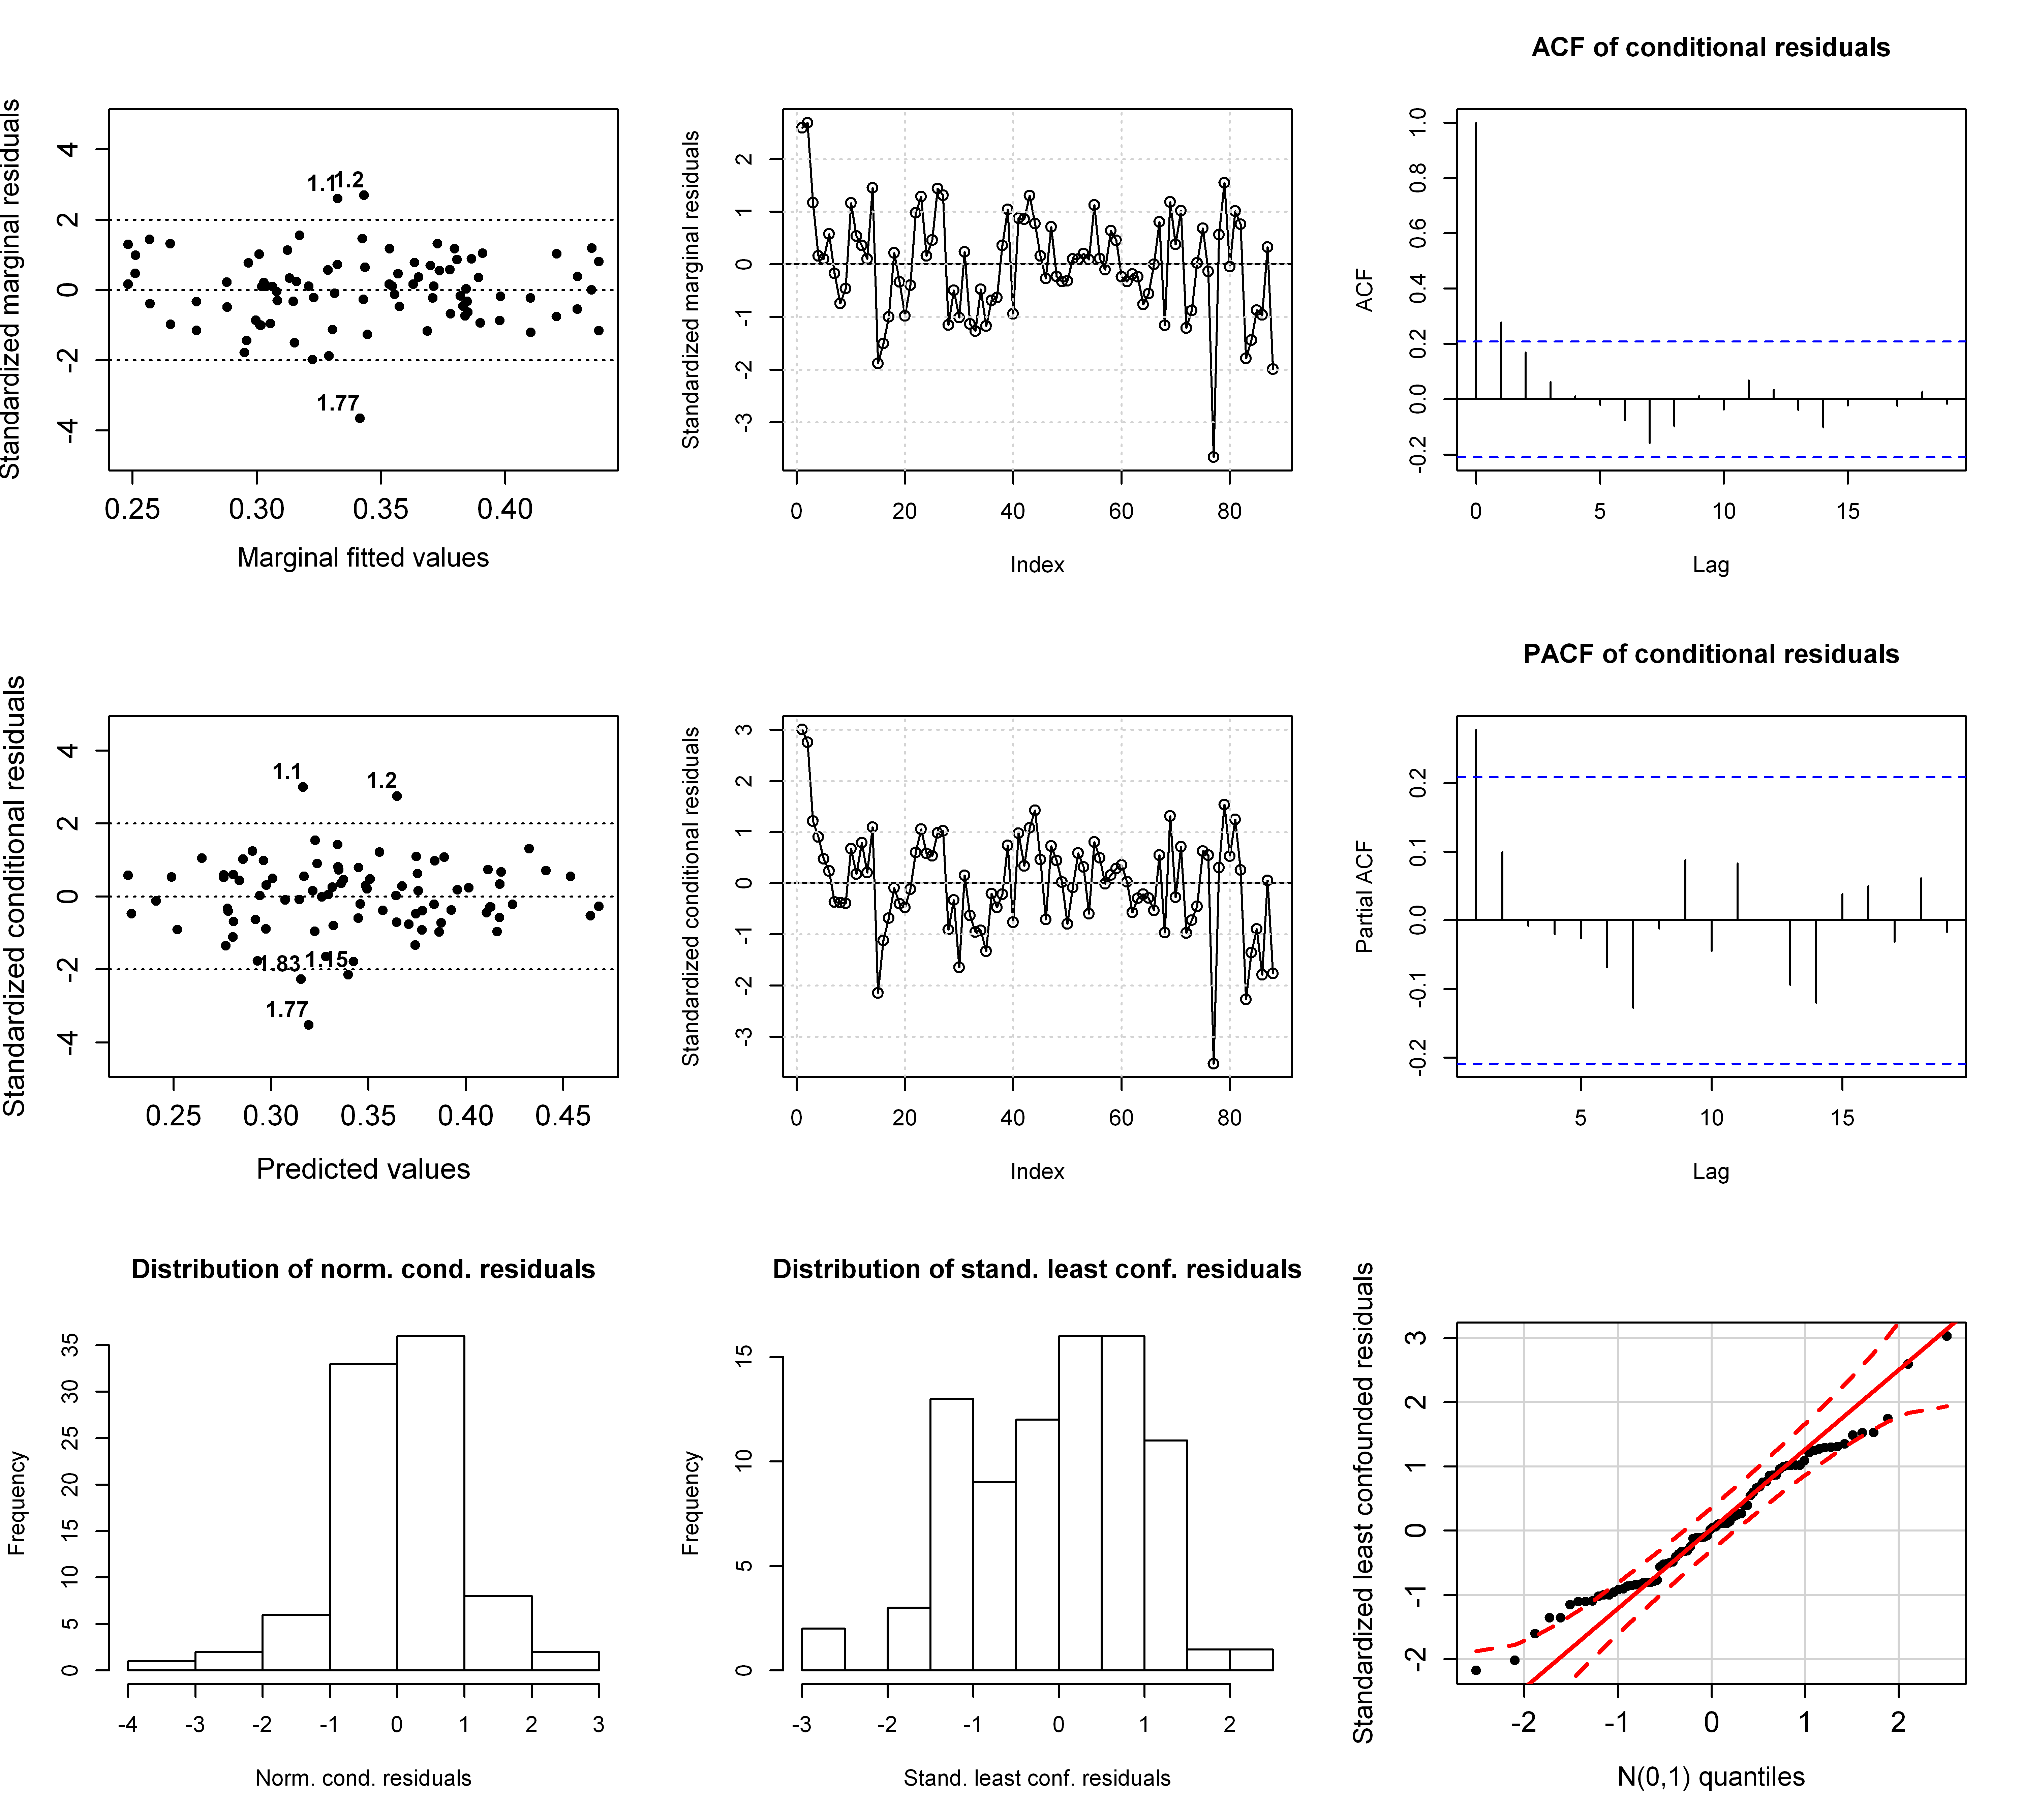

In [8]:
# Fitting the final FDSLRM
output <- fitDiagFDSLRM(as.numeric(x), t, c(1/88,3/88), include_fixed_eff = c(0,1,1,1), 
                          freq_random = c(6/88,22/88), include_random_eff = c(0,1,1,1))

options(repr.plot.res=600, repr.plot.height=9, repr.plot.width=10)
drawDiagPlots("all", output)

### Numerical tests

#### Tests of residual independence

In [9]:
print(output$Box_test_lag10_resid)
print(output$BoxLjung_test_lag10_resid)


	Box-Pierce test

data:  resid(fit)
X-squared = 13.408, df = 10, p-value = 0.2017


	Box-Ljung test

data:  resid(fit)
X-squared = 14.205, df = 10, p-value = 0.1639



#### Test of residual normality

In [10]:
print(output$ShapiroWilk_test_norm_cond_resid)
print(output$ShapiroWilk_test_stand_least_conf_resid)


	Shapiro-Wilk normality test

data:  resid(fit, type = "normalized")
W = 0.97035, p-value = 0.04111


	Shapiro-Wilk normality test

data:  SingerEtAl_resid_diag$least.confounded.residuals
W = 0.97959, p-value = 0.2035



| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 

***
<a id=fitting_summary></a>
# <font color=brown> Fitting summary </font>

### Parameter estimates

#### Estimates of regression coefficients

In [11]:
drawTable(type = "fixed", fixed_eff = output$fixed_effects)

,$\beta_{1}$,$\beta_{2}$,$\beta_{3}$,$\beta_{4}$
,0.3429742,-0.0345359,-0.0205618,0.0571988


#### Predictions of random effects

In [12]:
drawTable(type = "random", random_eff = output$random_effects)

,$Y_{1}$,$Y_{2}$,$Y_{3}$
,-0.0101344,-0.0292973,-0.0119303


#### Estimates of variance parameters

In [13]:
drawTable(type = "variance", variances = c(output$error_variance, diag(output$rand_eff_variance)))

$\sigma_{0}^2$,$\sigma_{1}^2$,$\sigma_{2}^2$,$\sigma_{3}^2$
0.0032675,0.0001527,0.0009271,0.0001962


### Fit summary

#### Graphical  summary for the final model
* plot: **time series observations (black), fitted values (blue), estimated trend (red) vs times**

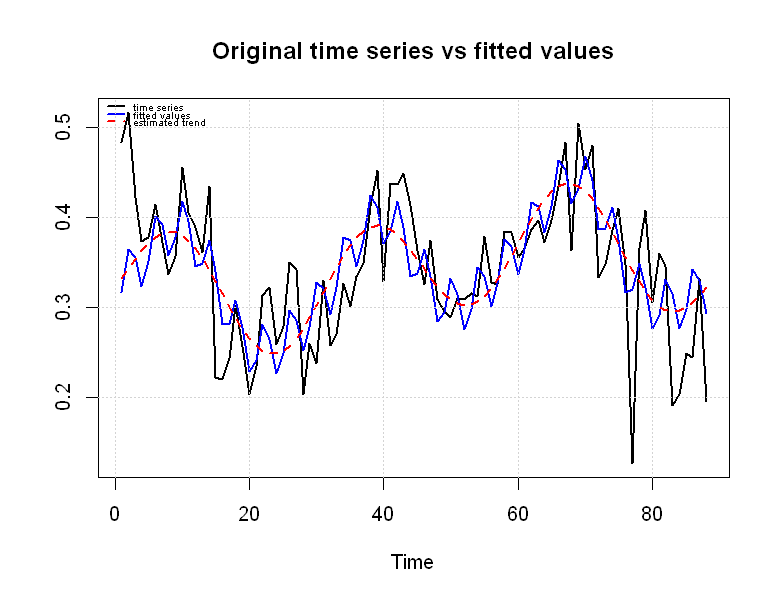

In [14]:
options(repr.plot.res=120, repr.plot.height=5, repr.plot.width=6.5)
drawDiagPlots(output$diagnostic_plots_names$FittedTimeSeries, output)

#### Numerical summary for the final model

In [15]:
print(output$fit_summary)

Linear mixed-effects model fit by REML
 Data: d 
        AIC       BIC   logLik
  -205.5706 -186.1241 110.7853

Random effects:
 Formula: ~-1 + v1 + v2 + v3 | g
 Structure: Diagonal
                v1         v2         v3   Residual
StdDev: 0.01235575 0.03044808 0.01400727 0.05716207

Fixed effects: as.formula(paste("x~", paste(names(d)[2:kk], collapse = "+"))) 
                 Value   Std.Error DF  t-value p-value
(Intercept)  0.3429742 0.006093497 84 56.28528  0.0000
f2          -0.0345359 0.008617507 84 -4.00764  0.0001
f3          -0.0205618 0.008617507 84 -2.38605  0.0193
f4           0.0571988 0.008617507 84  6.63751  0.0000
 Correlation: 
   (Intr) f2 f3
f2 0           
f3 0      0    
f4 0      0  0 

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-3.38661324 -0.54976018  0.04084508  0.57388044  2.92524775 

Number of Observations: 88
Number of Groups: 1 


| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 

***
<a id=session_info></a>
# <font color=brown> Session info </font>

In [16]:
print(sessionInfo())

R version 3.5.1 (2018-07-02)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 17763)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] CVXR_0.99-5      pracma_2.2.5     gnm_1.1-0        sommer_3.9.3    
 [5] crayon_1.3.4     lattice_0.20-38  matrixcalc_1.0-3 fpp2_2.3        
 [9] expsmooth_2.3    fma_2.3          ggplot2_3.1.1    forecast_8.7    
[13] nlme_3.1-139     car_3.0-2        carData_3.0-2    Matrix_1.2-17   
[17] MASS_7.3-51.4    IRdisplay_0.7.0  kableExtra_1.1.0 fdslrm_0.1.0    

loaded via a namespace (and not attached):
 [1] xts_0.11-2        scs_1.2-3         bit64_0.9-7       webshot_0.5.1    
 [5] httr_1.4.0        r

| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 

***
<a id=references></a>
# <font color=brown> References </font>


* Brockwell, P. J., Davis, R. A. (2016). [Introduction to Time Series and Forecasting (3rd ed.)](https://www.springer.com/la/book/9783319298528). New York, NY: Springer


* Gajdoš, A., Hanč, J., Hančová, M. (2019), [R package for modeling and prediction of time series using linear mixed models](https://github.com/fdslrm/R-package), GitHub repository https://github.com/fdslrm/R-package


* R Core Team (2019). R: A language and environment for statistical computing. R Foundation for
  Statistical Computing, Vienna, Austria. URL: https://www.R-project.org/

| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 